# <p style="font-size:145%;margin:0;text-align:center;font-family:system-ui;font-weight:900"> <span style='color:#693668'>~ </span> NLP: before transformers <span style='color:#693668'>~</span></p>

# <span style='color:#693668'> **1. Introduction** </span>

<div style="font-size:105%;font-family:sans-serif">
    

**Natural Language Processing** (**NLP**) is an area of artificial intelligence that deals with the processing and analysis of human language using computer technology.
    
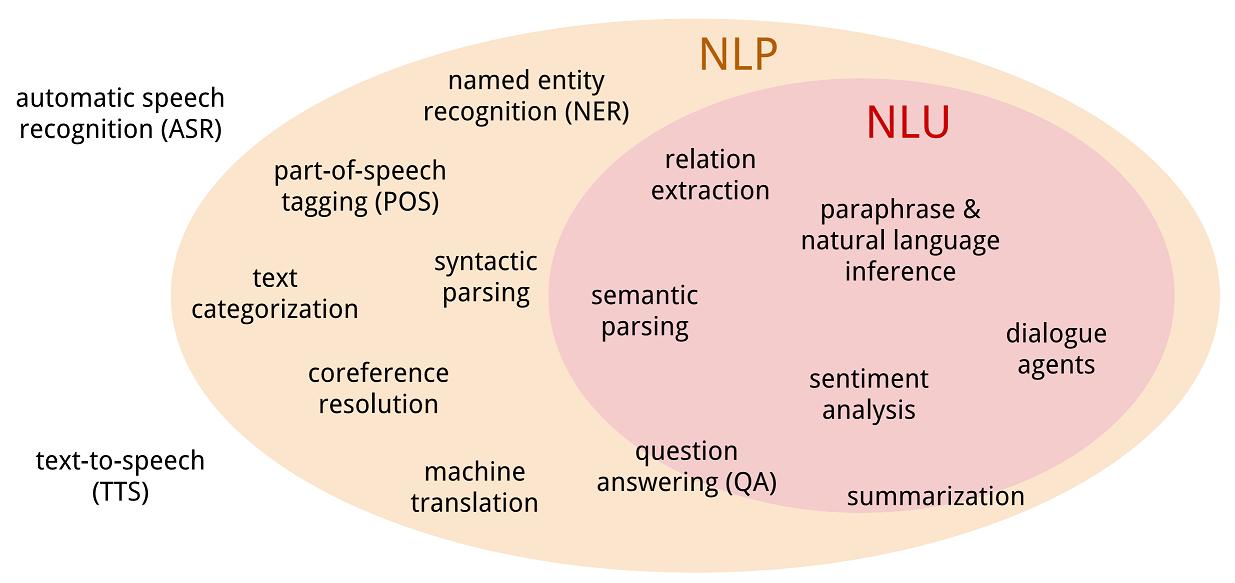

## <span style='color:#693668'> **1.1 Main Tasks** </span>

<div style="font-size:105%;font-family:sans-serif">

* **Text Classification**
    * *main goal*: predict tags, categories, sentiment
    * *input*: bag of words
    * *application*: filtering spam
* **Word Sequence**
    * *main goal*: predict next word / text generation
    * *input*: sequence of word in original order
    * *application*: translation, chatbots
* **Text Meaning**
    * *main goal*: understand text meaning
    * *input*: word vectors
    * *application*: question answering
* **Sentiment Analysis**
* **Named Entity Recognition (NER)**
* **Text Summarization**
* [**Generating Content**](https://dzen.ru/a/ZTKSR7JRj0iG054q)

## <span style='color:#693668'> **1.2 Main Problems** </span>

<div style="font-size:105%;font-family:sans-serif">
    
* Ambiguity of language
* Variability of language
* Complexity of language structure
* Lack of labeled data
* Cultural and contextual features


## <span style='color:#693668'> **1.3 Main Models** </span>

1. **Word Embeddings**:
   - Word2Vec (CBOW, Skip-Gram)
   - GloVe (Global Vectors for Word Representation)
   - FastText
   - ELMo (Embeddings from Language Models)
2. **Recurrent neural network**:
   - Simple RNN
   - Long Short-Term Memory (LSTM)
   - Gated Recurrent Unit (GRU)
   - Bi-directional RNN
3. **Convolution neural network**:
   - TextCNN
   - CharCNN
4. **Transformers**:
   - BERT (Bidirectional Encoder Representations from Transformers)
   - GPT (Generative Pre-trained Transformer)
   - T5 (Text-to-Text Transfer Transformer)
   - XLNet
5. **Hybrid models**:
   - CNN-RNN
   - Transformer-RNN
6. **Multilingual/cross-language models**:
   - mBERT (Multilingual BERT)
   - XLM-R (Cross-lingual Language Model Pretraining)
   - mT5 (Multilingual T5)
7. **Autoregressive language models**:
   - GPT-3 (Generative Pre-trained Transformer 3)
   - Megatron-LM

## <span style='color:#693668'> **1.4 Main Python Libraries** </span>


1. **Natural Language Toolkit (NLTK)**: library for building Python programs for tasks such as tokenization, tagging, parsing, and semantic reasoning.
2. **spaCy**: library for quick parsing of large amounts of text and suitable for statistical NLP and deep learning.
3. **TextBlob**: library thfor text analysis tasks such as sentiment analysis, language detection, and word cloud generation.
4. **Gensim**: library for topic modeling and document similarity analysis, particularly useful for large volumes of text data.
5. **CoreNLP**: Java library for NLP that can be used in Python, providing a wide range of tools and resources for handling and interpreting human language.
6. **Pattern**: web mining module for Python that includes tools for data mining, machine learning, and NLP.
7. **polyglot**: library that provides a unified interface for various NLP tasks, including language detection, sentiment analysis, and entity recognition.
8. **PyNLPI**: library for NLP that provides tools for tasks such as tokenization, stemming, and tagging.
9. **Hugging Face Transformers**: library built on top of PyTorch and TensorFlow, providing access to several transformer-based models for tasks like text question answering, language synthesis, and translation.
10. **scikit-learn**: machine learning library that includes tools for NLP tasks such as text classification, clustering, and topic modeling.

# <span style='color:#693668'> **2. Word Embeddings** </span>

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning. Word embeddings are an improvement over simpler [bag-of-words](https://www.kaggle.com/code/vipulgandhi/bag-of-words-model-for-beginners) model (word counts, frequencies)

**The main ideas:**
1. Words that are close in meaning should have similar vector representations.
2. Vector operations on words should reflect semantic and syntactic relations.

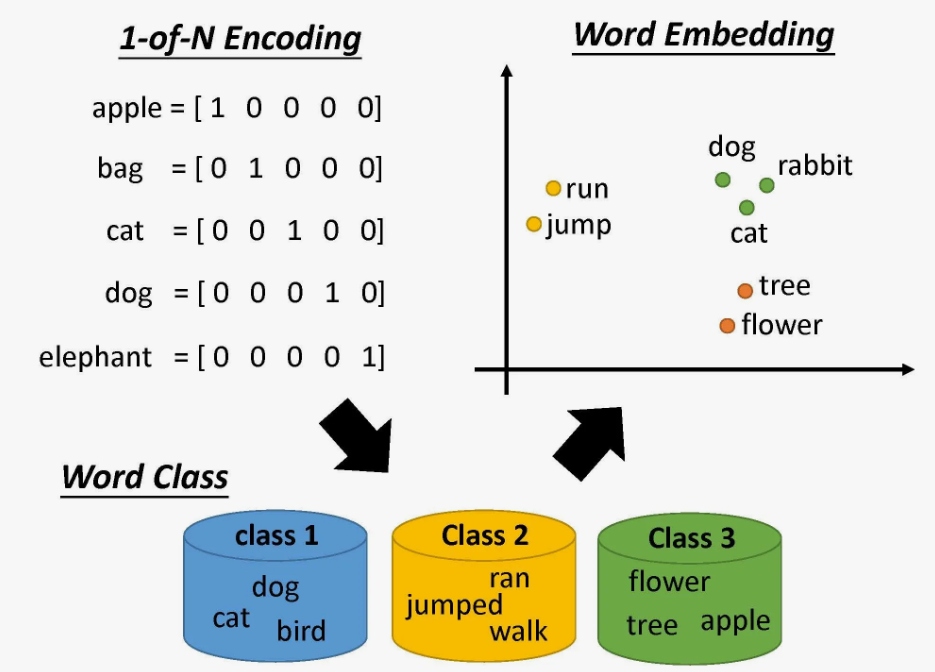


Trained word embeddings are widely used as input data for various more complex NLP models

## <span style='color:#693668'> **2.1 Word2Vec** </span>

[Word2Vec](https://code.google.com/archive/p/word2vec/) is the most famous method for generating word embeddings, based on neural networks.

The Word2Vec uses two main algoritms to train: *Continuous Bag of Words* (CBOW) and *Continuous Skip-Gram*. Both algorithms are designed to learn the relationships between words in a large corpus of text.

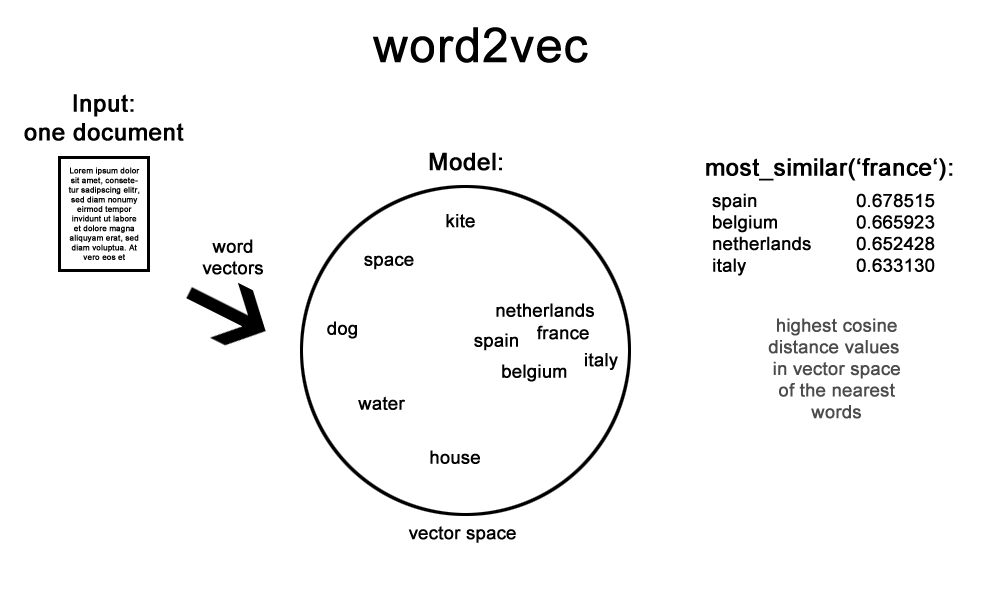

**Continuous Bag of Words (CBOW) Model**

The CBOW model predicts the central word in a context window based on the surrounding words. The context window typically includes a few words before and after the target word. The model is trained to maximize the likelihood of predicting the target word given the context words.

**Continuous Skip-Gram Model**

The Skip-Gram model is designed to achieve the opposite of the CBOW model. Instead of predicting the target word, it predicts the context words given the target word. The Skip-Gram model is particularly effective at representing infrequent words and performs well with limited amounts of data.

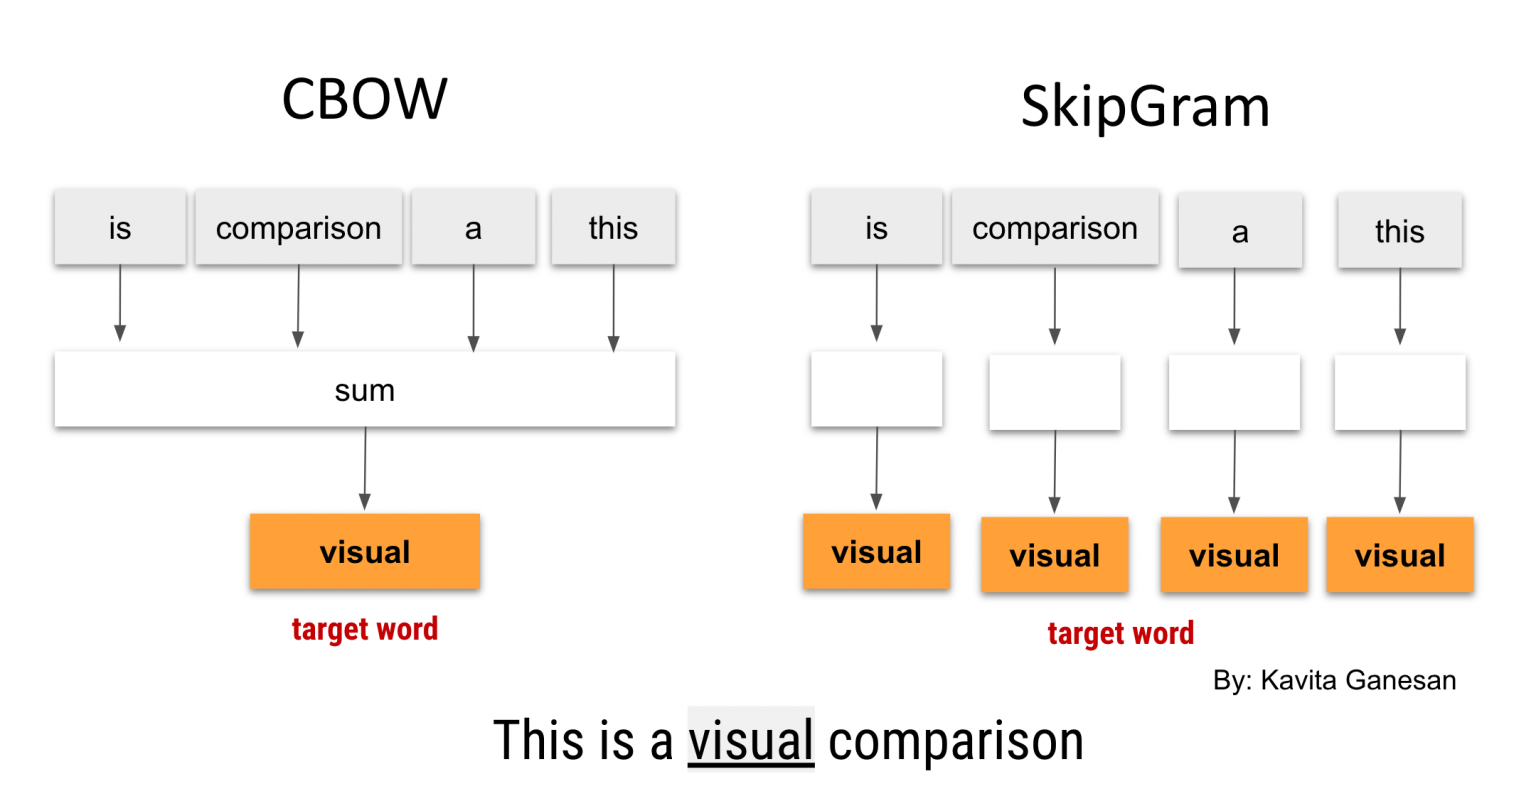

**Word2vec** is a model whose parameters are the word vectors. Train the model on a certain objective. At every iteration, we run our model, evaluate the errors and backpropagate the gradients in the model.The embedding matrix (parameters) is initialized randomly using a Normal or uniform distribution.

In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# load datasets
corpus = common_texts
corpus

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [2]:
# Train Word2Vec (cbow by default)
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

In [3]:
# Get vector for word "human"
human_vector = model.wv['human']
print(human_vector)

[ 9.7702928e-03  8.1651136e-03  1.2809718e-03  5.0975787e-03
  1.4081288e-03 -6.4551616e-03 -1.4280510e-03  6.4491653e-03
 -4.6173059e-03 -3.9930656e-03  4.9244044e-03  2.7130984e-03
 -1.8479753e-03 -2.8769434e-03  6.0107317e-03 -5.7167388e-03
 -3.2367026e-03 -6.4878250e-03 -4.2346325e-03 -8.5809948e-03
 -4.4697891e-03 -8.5112294e-03  1.4037776e-03 -8.6181965e-03
 -9.9166557e-03 -8.2016252e-03 -6.7726658e-03  6.6805850e-03
  3.7845564e-03  3.5616636e-04 -2.9579818e-03 -7.4283206e-03
  5.3341867e-04  4.9989222e-04  1.9561886e-04  8.5259555e-04
  7.8633073e-04 -6.8160298e-05 -8.0070542e-03 -5.8702733e-03
 -8.3829118e-03 -1.3120425e-03  1.8206370e-03  7.4171280e-03
 -1.9634271e-03 -2.3252917e-03  9.4871549e-03  7.9704521e-05
 -2.4045217e-03  8.6048469e-03  2.6870037e-03 -5.3439722e-03
  6.5881060e-03  4.5101536e-03 -7.0544672e-03 -3.2317400e-04
  8.3448651e-04  5.7473574e-03 -1.7176545e-03 -2.8065301e-03
  1.7484308e-03  8.4717153e-04  1.1928272e-03 -2.6342822e-03
 -5.9857843e-03  7.32298

In [4]:
# 5 most similar words for "human"
similar_words = model.wv.most_similar('human', topn=5)
print(similar_words)

[('trees', 0.17272792756557465), ('eps', 0.16694682836532593), ('response', 0.11118265986442566), ('interface', 0.10940765589475632), ('system', 0.079634889960289)]



**Training Process**

The training process of Word2Vec involves the following steps:

1. **Data Preparation**: A large corpus of text is prepared, and each unique word is assigned an index.
2. **Model Selection**: Either the CBOW or Skip-Gram model is selected based on the specific task at hand.
3. **Training**: The model is trained on the prepared data using a neural network. The goal is to learn the relationships between words in the corpus.
4. **Vector Representation**: Each word is represented as a vector in a high-dimensional space. The vectors are learned in a way that preserves the semantic and syntactic relationships between words.

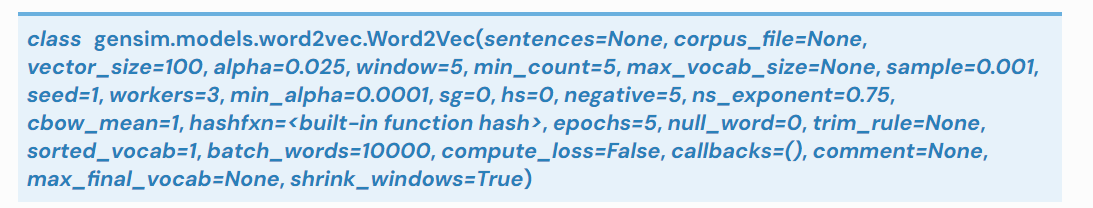

the most valuable params:
* `min_count = int` - Ignores all words with total absolute frequency lower than this - (2, 100)
* `window = int` - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
* `size = int` - Dimensionality of the feature vectors. - (50, 300)
* `sample = float` - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
* `alpha = float` - The initial learning rate - (0.01, 0.05)
* `min_alpha = float` - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
* `negative = int` - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
* `workers = int` - Use these many worker threads to train the model (=faster training with multicore machines)
* `sg = int` - algorithm (cbow of skip-gram)

some techniques:
* **Negative Sampling** - instead of updating the weights for all words in the vocabulary, negative sampling selects a random sample of negative words (not in context) for each positive (in context) word
* **Hierarchical Softmax** uses a binary tree to represent the vocabulary, where each leaf node corresponds to a word

In [6]:
import gensim
from gensim.models import Word2Vec
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
f
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import string

# data loading
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups_data.data
labels = newsgroups_data.target

# text preprocessing
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # text tokenization
    tokens = word_tokenize(text.lower())
    # remove stop-words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# train Word2Vec (create embeddings)
word2vec_model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=2, workers=4)

# transform text to vectors
def text_to_vector(text, model):
    words = [word for word in text if word in model.wv.index_to_key]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(model.wv[words], axis=0)

X = np.array([text_to_vector(text, word2vec_model) for text in processed_texts])
y = labels

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use label encoder 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Обучение классификатора (например, SVM)
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train_encoded)

# Предсказание и оценка модели
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Accuracy: 50.74%


**Disadvantages**
1. Inability to capture word polysemy
2. Lack of contextual information
3. Issues with rare and unknown (out-of-vocabulary) words
4. Inability to account for morphological structure of words
5. High computational complexity when training on large corpora

**Advantages**:
1. Simplicity and efficiency
2. Ability to capture semantic relationships between words
3. Versatility in various natural language processing tasks
4. Capability of unsupervised learning on unlabeled data
5. Transferability of trained word representations



Word2Vec has a wide range of applications, including search engines, language translation, and text similarity.

## <span style='color:#693668'> **2.2 GloVe** </span>
The GloVe model is a type of word embedding algorithm that represents words as vectors in a *high-dimensional space*. 
The main idea is that *words that appear together frequently in a corpus should have similar vector representations*

**Key features:**
* It is based on statistical analysis of the co-occurrence of words in a corpus of texts
* It uses global statistical data, unlike models based on local context, such as Word2Vec.
* The training of the GloVe model is done using the word co-occurrence matrix
* The GloVe model is available as pre-trained vector representations

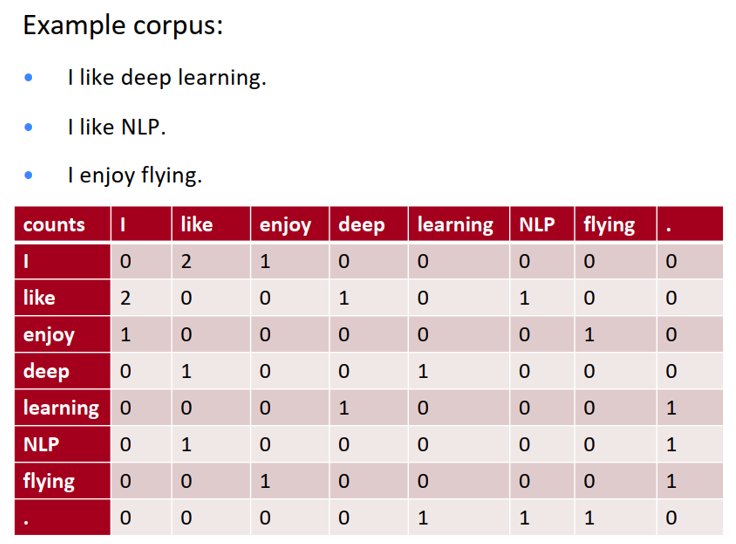


**Training Proccess**

The GloVe model is trained using a large corpus of text.
The training process involves the following steps:

1. **Tokenization**: The text is broken down into individual words or tokens.
2. **Co-occurrence Matrix**: A co-occurrence matrix is created to store the frequency of each word and its context words.
3. **Vector Representation**: The co-occurrence matrix is factorized to obtain the vector representations of each word (Generate a VxV co-occurrence matrix X. Apply SVD on X. Select the first k columns of U to get a k-dimensional word vectors. The ratio of the variances indicates the amount of variance captured by the first k dimensions).

In [18]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords

# load dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# load pretrained GloVe
glove_model = api.load('glove-wiki-gigaword-100')

# Remove stop-words
stop_words = set(stopwords.words('english'))
X_train_processed = [' '.join([word for word in doc.split() if word.lower() not in stop_words]) for doc in X_train]
X_test_processed = [' '.join([word for word in doc.split() if word.lower() not in stop_words]) for doc in X_test]

# Create TF-IDF matrix
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_processed)
X_test_tfidf = tfidf.transform(X_test_processed)

# Create matrix of word-embeddings
vocab = glove_model.key_to_index
vocab_size = len(vocab)
embedding_dim = glove_model.vector_size
word_embeddings = np.zeros((vocab_size, embedding_dim))
for word, index in vocab.items():
    word_embeddings[index] = glove_model[word]

# Create feature matrix using GloVe
def get_document_vector(text, word_embeddings):
    doc_vector = np.zeros(word_embeddings.shape[1])
    num_words = 0
    for word in text.split():
        if word in vocab:
            doc_vector += word_embeddings[vocab[word]]
            num_words += 1
    if num_words > 0:
        doc_vector /= num_words
    return doc_vector

X_train_glove = np.array([get_document_vector(text, word_embeddings) for text in X_train_processed])
X_test_glove = np.array([get_document_vector(text, word_embeddings) for text in X_test_processed])

# Union TF-IDF & GloVe 
X_train_combined = np.hstack((X_train_tfidf.toarray(), X_train_glove))
X_test_combined = np.hstack((X_test_tfidf.toarray(), X_test_glove))

# Train and evaluate
clf = LogisticRegression()
clf.fit(X_train_combined, y_train)
accuracy = clf.score(X_test_combined, y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 66.50%


**Advantages**:

1. Use of global statistics
2. Availability of pre-trained models
3. Efficiency and scalability

**Disadvantages**:

1. Sensitivity to rare words
2. Lack of contextual information
3. Limited handling of out-of-vocabulary words
4. Complexity of hyperparameter tuning: 
5. Limitations in handling polysemous words

The GloVe model has several applications in natural language processing, including Text classification, Language modeling, Word sense induction

**Optional: the main differences between GloVe and Word2Vec**

1. *Training process*: Word2Vec uses a shallow neural network to create vectors, while GloVe uses a global matrix factorization technique.
2. *Vector representation*: Word2Vec creates vectors that represent the context of words, while GloVe creates vectors that represent the co-occurrence of words.
3. *Computational complexity*: Word2Vec has a higher computational complexity than GloVe, which makes it slower to train.
4. *Metaparameter optimization*: GloVe does fairly well without needing metaparameter optimization, while Word2Vec's training process involves more hyperparameter tuning.

# <span style='color:#693668'> **3. RNN** </span>

Recurrent Neural Networks (RNNs) are an important class of deep learning models that are widely used in natural language processing (NLP) tasks

**Key features of RNNs**

1. Sequential data processing:
   - RNNs process input data sequentially, step by step, unlike traditional neural networks that process the entire input at once.
   - This allows RNNs to effectively model sequential data, such as text, speech, or time series.
2. Use of internal state:
   - RNNs have an internal state that is maintained and passed from one step to the next.
   - This state allows RNNs to take into account the context and dependencies between elements of the sequence.
3. Parameter sharing:
   - The weights of RNNs are shared across all steps of the sequence processing.
   - This means that RNNs use the same parameters to process each element of the sequence, making them more efficient and scalable.

**Main RNN architectures in NLP**

1. Simple RNN:
   - The basic RNN architecture, where one element of the sequence is processed at each step.
   - Used for tasks such as text generation, machine translation, speech recognition.
2. Long Short-Term Memory (LSTM):
   - An extension of the simple RNN, which uses special memory cells to better remember long-term dependencies.
   - Widely used in tasks where context and long-term dependencies are important, such as text generation, sentiment analysis, machine translation.
3. Bi-directional Recurrent Neural Network (Bi-RNN):
   - An architecture where the RNN processes the sequence in both directions: from beginning to end and from end to beginning.
   - This allows Bi-RNNs to take into account context from both previous and subsequent elements of the sequence, improving the quality of text data processing.

**Application of RNNs in NLP**
- Text generation: RNNs are used to generate sequences of words, for example, in tasks of automatic text generation, machine translation, question answering.
- Text classification: RNNs can effectively process sequences of words for classification tasks, such as sentiment analysis, document categorization.
- Language modeling: RNNs are used to build language models that can predict the next word in a sequence.
- Speech processing: RNNs are used in speech recognition, speech synthesis, and audio data processing tasks.


**Differences between RNN and word embeddings**
1. **Input Representation:** RNNs process sequential input data, while word embeddings represent individual words as vectors.
2. **Contextual Information:** RNNs capture contextual information from the input sequence, whereas word embeddings capture semantic and syntactic information about individual words.
3. **Training Objectives:** RNNs are typically trained to predict the next element in a sequence, while word embeddings are trained to preserve semantic relationships between words.
4. **Applications:** RNNs are commonly used for tasks like language modeling, machine translation, and text classification, whereas word embeddings are used in a wide range of NLP tasks, including text classification, sentiment analysis, and information retrieval.

## <span style='color:#693668'> **3.1 Bi-dimensial RNN** </span>

A Bidirectional RNN (Bi-RNN) is a type of Recurrent Neural Network (RNN) that processes input sequences in both the forward and backward directions. This allows the network to capture information from the input sequence that may be relevant to the output prediction, but would be lost in a traditional RNN that only processes the input sequence in one direction.

**Architecture**

A Bi-RNN consists of two separate RNNs: one that processes the input sequence from left to right (forward RNN), and another that processes the input sequence from right to left (backward RNN). The outputs of these two RNNs are then combined to produce the final output. The combination method can vary, but common approaches include concatenation, element-wise addition, or multiplication.

**Training**

Bi-RNNs can be trained using similar algorithms to RNNs, but with some modifications. During the forward pass, the forward RNN processes the input sequence in the usual way, and the backward RNN processes the input sequence in the reverse direction. The outputs of both RNNs are then combined and compared to the target output sequence. The error is backpropagated through the network to update the weights of both RNNs.

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# load dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization & data preprocessing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Add
X_train_pad = np.expand_dims(X_train_pad, axis=-1)
X_test_pad = np.expand_dims(X_test_pad, axis=-1)

# Build Bi-RNN
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(max_length, 1)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(y)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss:.2f}")
print(f'Accuracy: {accuracy * 100:.2f}%')

2024-05-15 09:02:21.758212: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 09:02:21.758309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 09:02:21.903521: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 2813s 6s/step - accuracy: 0.0499 - loss: 3.0018 - val_accuracy: 0.0485 - val_loss: 2.9918
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 2816s 6s/step - accuracy: 0.0555 - loss: 2.9913 - val_accuracy: 0.0637 - val_loss: 2.9823
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 2867s 6s/step - accuracy: 0.0753 - loss: 2.9775 - val_accuracy: 0.0883 - val_loss: 2.9477
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 2878s 6s/step - accuracy: 0.0888 - loss: 2.9471 - val_accuracy: 0.0907 - val_loss: 2.9228
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 2880s 6s/step - accuracy: 0.0953 - loss: 2.9231 - val_accuracy: 0.0931 - val_loss: 2.9092
118/118 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.0898 - loss: 2.9211
Test Loss: 2.91
Accuracy: 9.31%


**Advantages**

* Bi-RNNs are particularly useful for tasks that require understanding the context of a word or phrase, such as language processing, sentiment analysis, and speech recognition. 
* Bi-RNNs can capture long-term dependencies in the input sequence and are more accurate than traditional RNNs in many cases.

**Disadvantages**

* computationally expensive due to the increased number of calculations required
* can be challenging to parallelize
* have more parameters to optimize, which can lead to overfitting, especially when trained on small datasets

# <span style='color:#693668'> **Resources** </span>

1. [Sentiment analysis with Word2vec](https://www.kaggle.com/code/varun08/sentiment-analysis-using-word2vec)
2. [NLP course from Samsung](https://stepik.org/course/54098/promo)
3. https://medium.com/@kashyapkathrani/all-about-embeddings-829c8ff0bf5b
4. [NLP Cheatsheet](https://www.kaggle.com/code/rftexas/nlp-cheatsheet-master-nlp)
5. [Word2vec and GloVe](https://www.kaggle.com/code/saxinou/word2vec-and-glove)
6. [RNN, GloVe, ...](https://www.kaggle.com/code/ankitp013/bert-bi-lstm-gru-s-rnn-with-glove-and-fasttext)

# <span style='color:#693668'> **Conclusion** </span>

As NLP continues to evolve, it is essential to address the ethical considerations and challenges associated with it, ensuring that its potential is harnessed for the betterment of society.



**best regards!**